# Online Retail Transaction Analysis

**Project Goal:** To analyse online retail transaction data to understand customer behavior, identify popular products, optimise pricing and marketing strategies.

**Author:** Mitesh Kumar  
**Dataset:** Online Retail Transactions from Kaggle


## Table of Contents

1. Setup & Imports
2. Data Loading
3. Data Understanding
4. Data Cleaning
5. Question 1: Customer Behavior
6. Question 2: Top Products
7. Question 3: Geographic Analysis
8. Question 4: Underperforming Products
9. Summary 



## 1. Setup & Imports

Import all the Python libraries needed for the analysis.

In [2]:
# Import library for data manipulation
import pandas as pd

# Import library for mathematical operations
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import library for date/time handling
from datetime import datetime

# Hides warning messages to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Set display options to show more rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set default style for charts
plt.style.use('seaborn-v0_8-darkgrid')

# Confirms libraries loaded successfully
print("All libraries imported successfully")

All libraries imported successfully


## 2. Data Loading

Loading orginial data set online_retail

In [4]:
# Loading orginal data
df = pd.read_csv('../data/online_retail.csv')

In [5]:
# Display confirmation message
print("Data loaded successfully")

# Show basic information about the dataset
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

Data loaded successfully
Total rows: 541,909
Total columns: 8


## 3. Data Understanding

Exploring the dataset to understand its structure.

### 3.1 First Look at the Data

In [8]:
# Displays the first 10 rows of the dataset. This helps us see what the data looks like.
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


### 3.2 Dataset Information

In [9]:
# Shows detailed information about the dataset. This tells us the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


### 3.3 Statistical Summary

In [10]:
# Show statistical summary of numerical columns. This includes mean, min, max, etc.
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


## What This Check Tells Us:
After running df.describe(), noticed negative values in Quantity and Price columns. This data quality check shows exactly how many errors exist in our dataset.

### What Each Check Means:
1. Missing Descriptions

Counts products without names/descriptions
Problem: Can't identify what was sold
Impact: won't get accurate result for product analysis

2. Negative Quantities

Counts transactions with negative quantities (e.g. -5 units, -10 units etc.)
Likely reason: Returns, refunds or cancellations
Impact: Will distort sales volume if not handled properly

3. Zero Prices

Counts items sold for £0
Possible reasons: Free samples, promotions or data errors
Impact: Will inflate quantity counts but won't count towards revenue


### 3.4 Check for Data Quality Issues

In [11]:
# Count missing values in each column
missing_desc = df['Description'].isnull().sum()

print(f" Missing descriptions: {missing_desc:,}")

 Missing descriptions: 1,454


In [12]:
# Count rows with negative quantities (returns/refunds)
negative_qty = (df['Quantity'] < 0).sum()

print(f"   Negative quantities: {negative_qty:,}")

   Negative quantities: 10,624


In [13]:
# Count rows with zero prices
zero_price = (df['UnitPrice'] == 0).sum()

print(f" Zero prices: {zero_price:,}")

 Zero prices: 2,515


In [15]:
# Calculates total issues
total_issues = missing_desc + negative_qty + zero_price

print(f"Total rows with issues: {total_issues:,}")

Total rows with issues: 14,593


## 4. Data Cleaning

Remove problems in data to ensure quality analysis.

### 4.1 Create a Working Copy

Create a copy of the original data so we don't modify the original.

In [27]:
# Create a copy of the original dataframe.This keeps the original 'df' and unchanged
df_clean = df.copy()

print(f"Working copy created")
print(f"Starting with: {len(df_clean):,} rows")

Working copy created
Starting with: 541,909 rows


### 4.2 Remove Missing Descriptions

Removes rows where the product description is missing.

In [30]:
# Counts how many rows we are removing
before = len(df_clean)

# Keeps only rows where Description is NOT null (not empty) ## .notnull() returns True if data exists, False if missing
df_clean = df_clean[df_clean['Description'].notnull()]

# Count how many rows we removed
after = len(df_clean)
removed = before - after

print(f" Before: {before:,} rows")
print(f" After: {after:,} rows")
print(f" Removed: {removed:,} rows")

 Before: 539,392 rows
 After: 539,392 rows
 Removed: 0 rows


### 4.3 Removing Zero Prices

Removes rows where the unit price is zero (likely errors or test data).

In [31]:
# Counts how many rows we're removing
before = len(df_clean)

# Keeps only rows where UnitPrice is greater than 0. This removes all zero and negative prices
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Counts how many rows we removed
after = len(df_clean)
removed = before - after

print(f" Before: {before:,} rows")
print(f" After: {after:,} rows")
print(f" Removed: {removed:,} rows")

 Before: 539,392 rows
 After: 539,392 rows
 Removed: 0 rows


### 4.4 Remove Negative Quantities

Remove rows with negative quantities (these are returns/refunds).

In [33]:
# Counts how many rows we're removing
before = len(df_clean)

# Keep only rows where Quantity is greater than 0. This removes all returns and refunds
df_clean = df_clean[df_clean['Quantity'] > 0]

# Counts how many rows we removed
after = len(df_clean)
removed = before - after

print(f" Before: {before:,} rows")
print(f" After: {after:,} rows")
print(f" Removed: {removed:,} rows")

 Before: 530,104 rows
 After: 530,104 rows
 Removed: 0 rows


In [41]:
# Display complete cleaning summary

print("Cleaning Summary")


# Show before and after of rows that were cleaned
print(f"\nOriginal dataset: {len(df):,} rows")
print(f"Cleaned dataset: {len(df_clean):,} rows")
print(f"Total removed: {len(df) - len(df_clean):,} rows")

print(f"\nChecking for Remaining issues:\n")

# Check for remaining issues
missing = df_clean['Description'].isnull().sum()
zeros = (df_clean['UnitPrice'] == 0).sum()
negatives = (df_clean['Quantity'] < 0).sum()

print(f"Missing descriptions: {missing}")
print(f"Zero prices: {zeros}")
print(f"Negative quantities: {negatives}")

# Final confirmation
if missing == 0 and zeros == 0 and negatives == 0:
    print("\nAll data quality issues have been fixed!")
else:
    print("\nWarning: Some issues still remain")

Cleaning Summary

Original dataset: 541,909 rows
Cleaned dataset: 530,104 rows
Total removed: 11,805 rows

Checking for Remaining issues:

Missing descriptions: 0
Zero prices: 0
Negative quantities: 0

All data quality issues have been fixed!


### 4.6 Save Cleaned Data

Saving the cleaned dataset to a new CSV file (online_retail_cleaned.csv)

In [42]:
# Save the cleaned dataframe to a new CSV file, index=False doesn't save the row numbers as a column.
df_clean.to_csv('../data/online_retail_cleaned.csv', index=False)

# Confirm file was saved
print(" Cleaned data saved!")
print(f" Rows saved: {len(df_clean):,}")

 Cleaned data saved!
 Rows saved: 530,104


##  Data cleaning complete

Going forward, will use the cleaned dataset for all analysis.

# QUICK START
**Already cleaned the data?** Run cell from here on to load the cleaned dataset and skip straight to analysis.


In [3]:
# Load the cleaned dataset
df = pd.read_csv('../data/online_retail_cleaned.csv')

print("Confirming cleaned Rows and Column:\n")
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}\n")

# Quick check to see if the data is clean

print("Check to see if the data is clean:\n")
print(f"Missing descriptions: {df['Description'].isnull().sum()}")
print(f"Zero prices: {(df['UnitPrice'] == 0).sum()}")
print(f"Negative quantities: {(df['Quantity'] < 0).sum()}")

Confirming cleaned Rows and Column:

Rows: 530,104
Columns: 8

Check to see if the data is clean:

Missing descriptions: 0
Zero prices: 0
Negative quantities: 0


## 5. Question 1: Are Customers Making Regular Purchases?

Goal: To Understand customer purchase behavior and identify repeat customers.

What we'll find:
- How many times each customer purchased
- Percentage of one-time vs repeat customers
- Customer segmentation

### 5.1 Calculate Purchase Frequency Per Customer

In [5]:
# Counts how many times each customer made a purchase. Using 'nunique()' to count unique invoices per customer
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename columns to match waht we want
customer_purchases.columns = ['CustomerID', 'Purchase_Count']

# Sort by purchase count to see most frequent customers first
customer_purchases = customer_purchases.sort_values('Purchase_Count', ascending=False)

# result of how many unique customers we have and who our top 10 customer that purchase frequently
print("Customer Purchase Frequency:")
print(f"\nTotal unique customers: {len(customer_purchases):,}")
print(f"\nTop 10 customers by purchase frequency:")
print(customer_purchases.head(10))

Customer Purchase Frequency:

Total unique customers: 4,338

Top 10 customers by purchase frequency:
      CustomerID  Purchase_Count
2159       15287            1431
326        12748             209
1879       14911             201
4010       17841             124
562        13089              97
1661       14606              93
2176       15311              91
481        12971              86
1689       14646              73
2702       16029              63


### 5.2 Categorize Customers (One-Time vs Repeat)

In [6]:
# One-time buyers: customers who purchased exactly once
one_time = (customer_purchases['Purchase_Count'] == 1).sum()

# Repeat customers: customers who purchased 2 or more times
repeat = (customer_purchases['Purchase_Count'] > 1).sum()


# Counts the total number of unique customers in our dataset
total_customers = len(customer_purchases)

# Calculates what percentage of customers only shopped once. 'one_time' is a count, so divide by total and multiply by 100 to get percentage
one_time_purchase = (one_time / total_customers) * 100

# Calculates what percentage of customers shopped more than once (repeat customers), repeat is a count, so divide by total and multiply by 100 to get percentage
repeat_purchase = (repeat / total_customers) * 100

# result of one time buyers and repeat customers
print(f"\nOne-time buyers: {one_time:,} ({one_time_purchase:.2f}%)")
print(f"Repeat customers: {repeat:,} ({repeat_purchase:.2f}%)")

# Show distribution between one timer buyers and repeat customers
print(f"\nPurchase frequency statistics:")
print(customer_purchases['Purchase_Count'].describe())


One-time buyers: 1,493 (34.42%)
Repeat customers: 2,845 (65.58%)

Purchase frequency statistics:
count    4338.000000
mean        4.601660
std        22.989074
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      1431.000000
Name: Purchase_Count, dtype: float64


### 5.3 Visualization: Customer Purchase Distribution

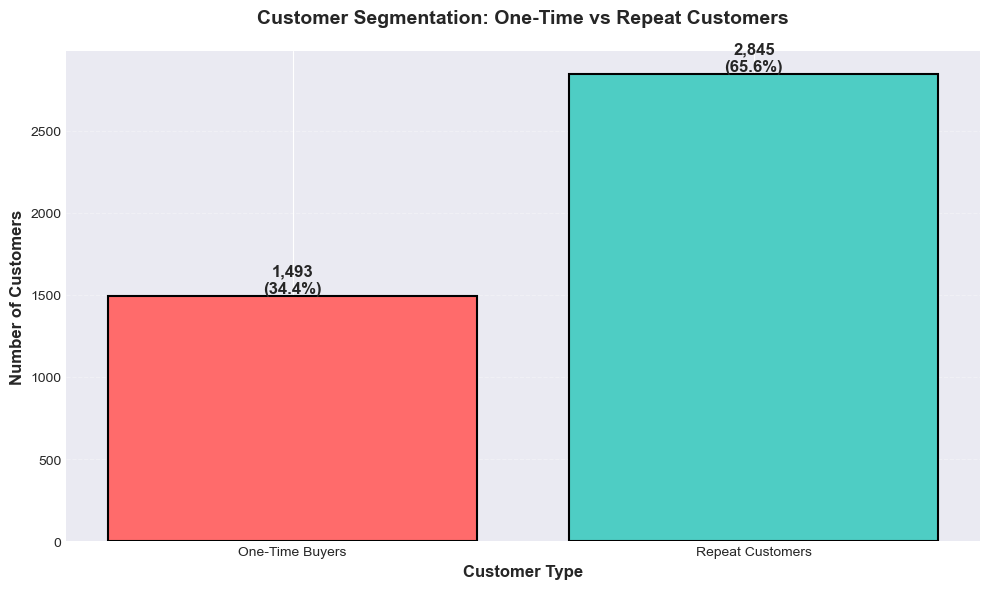

In [8]:
# Prepare data for visualization
categories = ['One-Time Buyers', 'Repeat Customers']
counts = [one_time, repeat]
colors = ['#FF6B6B', '#4ECDC4']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, f'{count:,}\n({counts[i]/total_customers*100:.1f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Customer Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Segmentation: One-Time vs Repeat Customers', 
          fontsize=14, fontweight='bold', pad=20)

# Add grid for readability
plt.grid(axis='y', alpha=0.3, linestyle='--')


# Save the chart
plt.tight_layout()
plt.savefig('C:/Users/mitesh/Desktop/Online retail project/images/customer_repeat_purchase.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.4 Key Findings - Customer Behavior

Summary:

- 65.58% repeat customer rate - Strong customer loyalty with 2,845 returning customers
- Average 4.6 purchases per customer - Engaged customer base with median of 2 purchases
- 4.42% one-time buyers - 1,493 customers represent retention opportunity
- Top customer: 1,431 purchases - potentially loyal customers


## 6. Question 2: What Are the Top Performing Products?

Goal: Identify which products generate the most revenue and have the highest sales volume.

What we'll find:
- Top 20 products by revenue
- Top 20 products by volume (units sold)
- Star products (high in both metrics)
- 80/20 rule analysis

### 6.1 Create Revenue Column

In [11]:
# Create Revenue column by multiplying Quantity and UnitPrice. Revenue = How many items × Price per item
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# shows the first five rows by deafult of column revenue
print("\nFirst 5 rows with Revenue:")
print(df[['Description', 'Quantity', 'UnitPrice', 'Revenue']].head())

# Shows the total revenue
total_revenue = df['Revenue'].sum()
print(f"\nTotal Revenue: £{total_revenue:,.2f}")


First 5 rows with Revenue:
                           Description  Quantity  UnitPrice  Revenue
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55    15.30
1                  WHITE METAL LANTERN         6       3.39    20.34
2       CREAM CUPID HEARTS COAT HANGER         8       2.75    22.00
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39    20.34
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39    20.34

Total Revenue: £10,666,684.54


### 6.2 Calculate Total Revenue Per Product

In [13]:
# Group by product and sum all revenue for each product
product_revenue = df.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index()

# Rename revenue column to total_revenue 
product_revenue.columns = ['StockCode', 'Description', 'Total_Revenue']

# Sort by revenue by highest first
product_revenue = product_revenue.sort_values('Total_Revenue', ascending=False)

# checking to see the result of revenue for the first 20 rows
print("Top 20 Products By Revenue:\n")
print(product_revenue.head(20))

Top 20 Products By Revenue:

     StockCode                         Description  Total_Revenue
4150       DOT                      DOTCOM POSTAGE      206248.77
1340     22423            REGENCY CAKESTAND 3 TIER      174484.74
2668     23843         PAPER CRAFT , LITTLE BIRDIE      168469.60
3640    85123A  WHITE HANGING HEART T-LIGHT HOLDER      104340.29
2877     47566                       PARTY BUNTING       99504.33
3619    85099B             JUMBO BAG RED RETROSPOT       94340.05
2123     23166      MEDIUM CERAMIC TOP STORAGE JAR       81700.92
4151         M                              Manual       78110.27
4153      POST                             POSTAGE       78101.88
2029     23084                  RABBIT NIGHT LIGHT       66964.99
1022     22086     PAPER CHAIN KIT 50'S CHRISTMAS        64952.29
3416     84879       ASSORTED COLOUR BIRD ORNAMENT       59094.93
3059     79321                       CHILLI LIGHTS       54117.76
2285     23298                      SPOTTY BUNT

In [15]:
# Shows summary statistics
print(f"\nTotal unique products: {len(product_revenue):,}")

# highest revenue
print(f"Highest revenue: £{product_revenue['Total_Revenue'].max():,.2f}")

# average revenue per product
print(f"Average revenue per product: £{product_revenue['Total_Revenue'].mean():,.2f}")


Total unique products: 4,161
Highest revenue: £206,248.77
Average revenue per product: £2,563.49


### 6.3 Calculate Total Volume Per Product

which products sold the most units

In [16]:
# Group by product and sum all quantities for each product
product_volume = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Rename the quantity column to Total_Quantity_Sold
product_volume.columns = ['StockCode', 'Description', 'Total_Quantity_Sold']

# Sort by quantity by highest first
product_volume = product_volume.sort_values('Total_Quantity_Sold', ascending=False)

# cheking to see the result of total volume for the first 20 rows.
print("Top 20 Prouducts By Volume:\n")
print(product_volume.head(20))

Top 20 Prouducts By Volume:

     StockCode                         Description  Total_Quantity_Sold
2668     23843         PAPER CRAFT , LITTLE BIRDIE                80995
2123     23166      MEDIUM CERAMIC TOP STORAGE JAR                78033
3128     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS                55047
3619    85099B             JUMBO BAG RED RETROSPOT                48474
3640    85123A  WHITE HANGING HEART T-LIGHT HOLDER                37599
1129     22197                      POPCORN HOLDER                36761
3416     84879       ASSORTED COLOUR BIRD ORNAMENT                36461
448      21212     PACK OF 72 RETROSPOT CAKE CASES                36419
2029     23084                  RABBIT NIGHT LIGHT                30788
1405     22492             MINI PAINT SET VINTAGE                 26633
1528     22616          PACK OF 12 LONDON TISSUES                 26135
946      21977  PACK OF 60 PINK PAISLEY CAKE CASES                24854
1109     22178     VICTORIAN GLASS 

In [17]:
# Shows summary statistics
print(f"\nTotal units sold: {product_volume['Total_Quantity_Sold'].sum():,}")

# highest volume
print(f"Highest volume: {product_volume['Total_Quantity_Sold'].max():,} units")

# average volume per product in units
print(f"Average volume per product: {product_volume['Total_Quantity_Sold'].mean():.2f} units")


Total units sold: 5,588,376
Highest volume: 80,995 units
Average volume per product: 1343.04 units


### 6.4 Visualization: Top 20 Products by Revenue

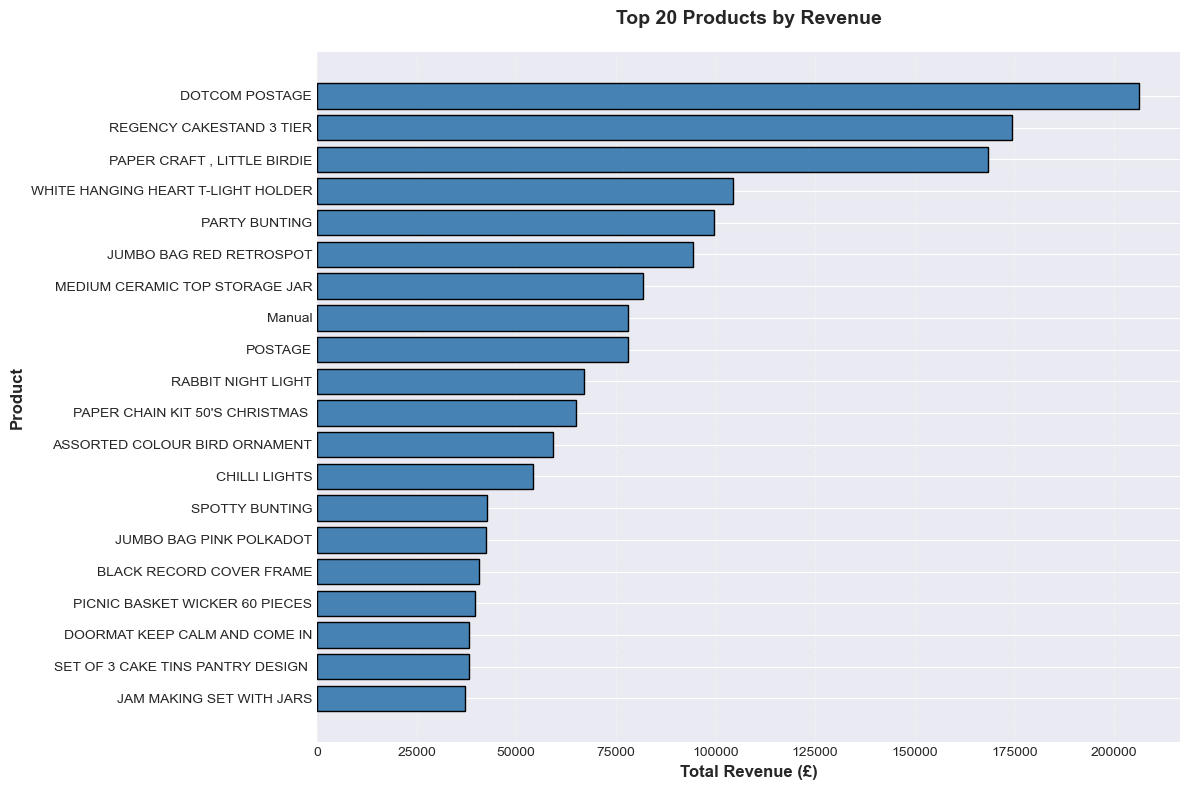

In [18]:
# Get top 20 products by revenue
top_20_revenue = product_revenue.head(20).copy()

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_revenue['Description'], top_20_revenue['Total_Revenue'], color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.title('Top 20 Products by Revenue', fontsize=14, fontweight='bold', pad=20)

# Invert y-axis so highest is at top
plt.gca().invert_yaxis()

# Add grid for readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Save the chart
plt.tight_layout()
plt.savefig('../images/top_products_revenue.png', dpi=300, bbox_inches='tight')
plt.show()


### 6.6 Finding "Best sellers" (High Revenue and High Volume)

Best selling products that appear in both (top 20 lists).

In [21]:
# Taking the top 20 from each list
top_20_rev = product_revenue.head(20)[['StockCode', 'Description']]
top_20_vol = product_volume.head(20)[['StockCode', 'Description']]

# Finding the products that appear in Both lists by merge() combining the two dataframes based on StockCode and Description
Best_seller = pd.merge(top_20_rev, top_20_vol, on=['StockCode', 'Description'])

# showing the result of best selling products by revenue and volume
print(f"\nBest selling products: {len(Best_seller)}")
print("\nBest seller list:\n")
print(Best_seller)




Best selling products: 8

Best seller list:

  StockCode                         Description
0     23843         PAPER CRAFT , LITTLE BIRDIE
1    85123A  WHITE HANGING HEART T-LIGHT HOLDER
2    85099B             JUMBO BAG RED RETROSPOT
3     23166      MEDIUM CERAMIC TOP STORAGE JAR
4     23084                  RABBIT NIGHT LIGHT
5     22086     PAPER CHAIN KIT 50'S CHRISTMAS 
6     84879       ASSORTED COLOUR BIRD ORNAMENT
7     22386             JUMBO BAG PINK POLKADOT


### 6.7 Pareto Analysis (80/20 Rule)

Checking to see if 20% of products generate 80% of revenue.

In [22]:
# Sorted products by revenue (already sorted in product_revenue)
product_revenue_sorted = product_revenue.copy()

# Calculating the total revenue
total_revenue = product_revenue_sorted['Total_Revenue'].sum()

# Calculating percentage for each product (slice of the pie each product represent)
product_revenue_sorted['Revenue_Percentage'] = (product_revenue_sorted['Total_Revenue'] / total_revenue) * 100

# Calculating cumulative percentage (totaling each item % till it hits 80%)
product_revenue_sorted['Cumulative_Percentage'] = product_revenue_sorted['Revenue_Percentage'].cumsum()

# Takes all rows before hitiing 80%
products_80_percent = product_revenue_sorted[product_revenue_sorted['Cumulative_Percentage'] <= 80].shape[0]

#total products sold
total_products = len(product_revenue_sorted)


percent_of_products = (products_80_percent / total_products) * 100

# Displaying the results

print("Pareto Analysis (80/20 RULE)\n")

print(f"\nTotal products: {total_products:,}")
print(f"Products generating 80% of revenue: {products_80_percent:,}")
print(f"Percentage: {percent_of_products:.2f}%")

if percent_of_products <= 20:
    print(f"\nThe 80/20 rule applies! {percent_of_products:.1f}% of products generate 80% of revenue")
else:
    print(f"\nThe 80/20 rule doesn't strictly apply. {percent_of_products:.1f}% of products generate 80% of revenue")

Pareto Analysis (80/20 RULE)


Total products: 4,161
Products generating 80% of revenue: 837
Percentage: 20.12%

The 80/20 rule doesn't strictly apply. 20.1% of products generate 80% of revenue


### 6.8 Key Findings - Product Performance

Summary:

- 20.12% of products generate 80% of revenue (837 out of 4,161 products)
- 837 "Best sellers" drive the business. These high-performers should be prioritized for inventory and marketing.
- 3,324 products (79.88%) contribute only 20% of revenue. Significant opportunity to optimise products and reduce inventory costs.


## 7. Question 3: Which Countries Do Products Sell Well In?

Goal: To Understand geographic sales patterns and identify top markets.

Key findings:
- Total revenue by country
- Top 10 countries
- Transaction count by country
- Popular products per country

### 7.1 Calculate Revenue by Country

In [23]:
# Group by country and sum revenue
country_revenue = df.groupby('Country')['Revenue'].sum().reset_index()

# Rename column Revenue to Total_Revenue
country_revenue.columns = ['Country', 'Total_Revenue']

# Sort by revenue (highest first)
country_revenue = country_revenue.sort_values('Total_Revenue', ascending=False)

# Showing results

print("Revenue By Country:\n")
# total countries 
print(f"\nTotal countries: {len(country_revenue)}")

# top 10 countries by revenue
print(f"\nTop 10 countries by revenue:")

# first 10 rows of countries by revenue
print(country_revenue.head(10))


Revenue By Country:


Total countries: 38

Top 10 countries by revenue:
           Country  Total_Revenue
36  United Kingdom    9025222.084
24     Netherlands     285446.340
10            EIRE     283453.960
14         Germany     228867.140
13          France     209715.110
0        Australia     138521.310
31           Spain      61577.110
33     Switzerland      57089.900
3          Belgium      41196.340
32          Sweden      38378.330


### 7.2 Calculate Transaction Count by Country

In [30]:
# Count transactions per country
country_transactions = df.groupby('Country')['InvoiceNo'].nunique().reset_index()

# Rename columns from invoiceNo to Transcation count
country_transactions.columns = ['Country', 'Transaction_Count']

# Sorting by transaction count 
country_transactions = country_transactions.sort_values('Transaction_Count', ascending=False)

# results of transcation count by country
print(f"Top 10 countries by transaction count:\n")
print(country_transactions.head(10))

Top 10 countries by transaction count:

           Country  Transaction_Count
36  United Kingdom              18021
14         Germany                457
13          France                392
10            EIRE                288
3          Belgium                 98
24     Netherlands                 94
31           Spain                 90
27        Portugal                 58
0        Australia                 57
33     Switzerland                 54


### 7.3 Visualization: Top 10 Countries by Revenue

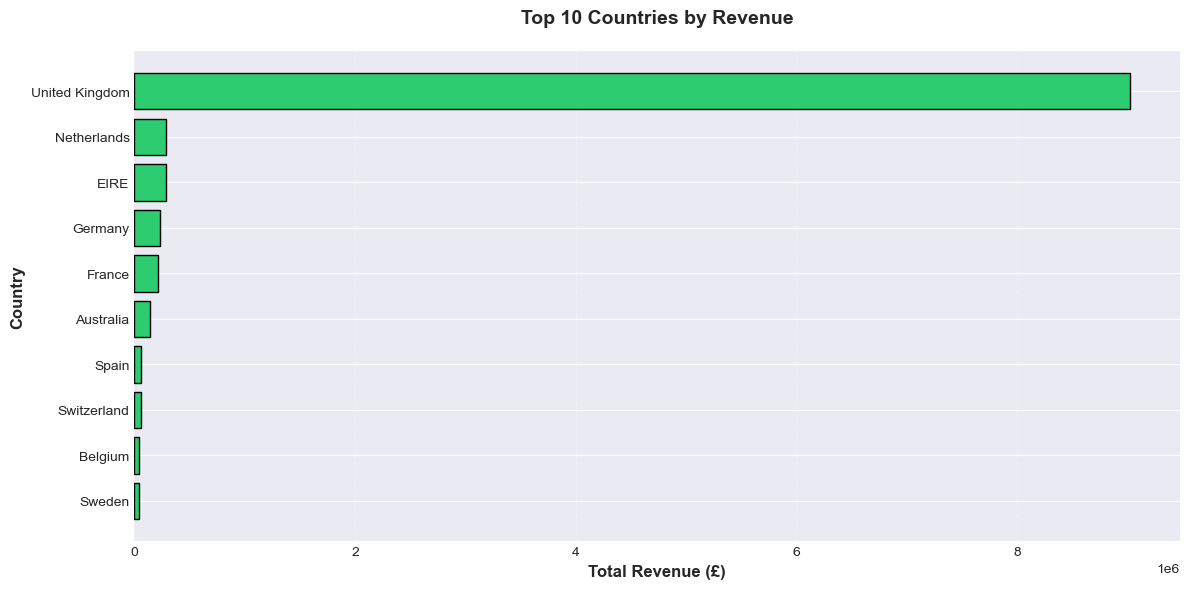

In [31]:
# taking the top 10 countries
top_10_countries = country_revenue.head(10).copy()

# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_10_countries['Country'], top_10_countries['Total_Revenue'], color='#2ECC71', edgecolor='black')

# Add labels and title
plt.xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold', pad=20)

# Invert y-axis
plt.gca().invert_yaxis()

# Add grid
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Save chart
plt.tight_layout()
plt.savefig('../images/geographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### 7.4 Key Findings - Geographic Revenue Analysis

Summary:

- UK dominates: £9M (89% of revenue)** - Nearly all money comes from one country
- Top 5 countries: 95% of revenue** - UK, Netherlands, Ireland, Germany, France
- 38 countries total, but minimal international sales - Only £1.1M (11%) from 37 non-UK countries

Business Insight:

Heavy UK dependence (89%) is risky - if UK market struggles, the whole business suffers. However, Netherlands, Ireland, Germany, and France each generate £200k+, proving international demand exists. These four markets are underdeveloped opportunities for growth and geographic diversification.

## 8. Question 4: Which Products Aren't Doing Well?

Goal: To identify underperforming products that may need attention.

Key findings:
- Bottom 20 products by revenue
- Bottom 20 products by volume
- Products to potentially discontinue

### 8.1 Find Lowest Revenue Products

In [33]:
# taking bottom 20 products by revenue. Already have product_revenue sorted, so we take from the end
bottom_20_revenue = product_revenue.tail(20).copy()

# Sorting in ascending order for better visualisation
bottom_20_revenue = bottom_20_revenue.sort_values('Total_Revenue', ascending=True)

# results of bottom 20 products
print("Bottom 20 Products By Revenue:\n")
print(bottom_20_revenue)
print(f"\nLowest revenue: £{bottom_20_revenue['Total_Revenue'].min():.2f}")



Bottom 20 Products By Revenue:

     StockCode                          Description  Total_Revenue
4152      PADS           PADS TO MATCH ALL CUSHIONS          0.003
3142     84227            HEN HOUSE W CHICK IN NEST          0.420
2357     23366      SET 12 COLOURING PENCILS DOILEY          0.650
2921    51014c               FEATHER PEN,COAL BLACK          0.830
487      21268             VINTAGE BLUE TINSEL REEL          0.840
3905     90084      PINK CRYSTAL GUITAR PHONE CHARM          0.850
3135    84201C       HAPPY BIRTHDAY CARD TEDDY/CAKE          0.950
3137    84206B       CAT WITH SUNGLASSES BLANK CARD          0.950
3499     84990  60 GOLD AND SILVER FAIRY CAKE CASES          1.100
2685    35597B             BLACKCHRISTMAS TREE 30CM          1.250
2363     23370      SET 36 COLOURING PENCILS DOILEY          1.250
3489     84977           WIRE FLOWER T-LIGHT HOLDER          1.250
3241    84569C      PACK 4 FLOWER/BUTTERFLY PATCHES          1.250
317      21009    ETCHED GLASS

### 8.2 Find Lowest Volume Products

In [34]:
# Getting bottom 20 products by volume
bottom_20_volume = product_volume.tail(20).copy()

# Sorting in ascending order
bottom_20_volume = bottom_20_volume.sort_values('Total_Quantity_Sold', ascending=True)

# result of bottom 20 prodcts by Volume
print("Bottom 20 Products By Volume:\n")
print(bottom_20_volume)

print(f"\nLowest volume: {bottom_20_volume['Total_Quantity_Sold'].min()} units")

Bottom 20 Products By Volume:

     StockCode                         Description  Total_Quantity_Sold
3227     84550      CROCHET LILAC/RED BEAR KEYRING                    1
3241    84569C     PACK 4 FLOWER/BUTTERFLY PATCHES                    1
3261    84596l      BISCUITS SMALL BOWL LIGHT BLUE                    1
3268    84613C  BLUE NEW BAROQUE FLOCK CANDLESTICK                    1
384      21120               *Boombox Ipod Classic                    1
408      21160         KEEP OUT GIRLS DOOR HANGER                     1
509      21310                    CAPIZ CHANDELIER                    1
3671     85144     JARDIN ETCHED GLASS BUTTER DISH                    1
3681    85160a        WHITE BIRD GARDEN DESIGN MUG                    1
3691    85170A    SET/6 IVORY BIRD T-LIGHT CANDLES                    1
3704    85179a             GREEN BITTY LIGHT CHAIN                    1
3947    90126A      PINK BERTIE MOBILE PHONE CHARM                    1
3969    90135A      ORANGE/FUSCHI

### 8.3 Visualization: Bottom 20 Products by Revenue

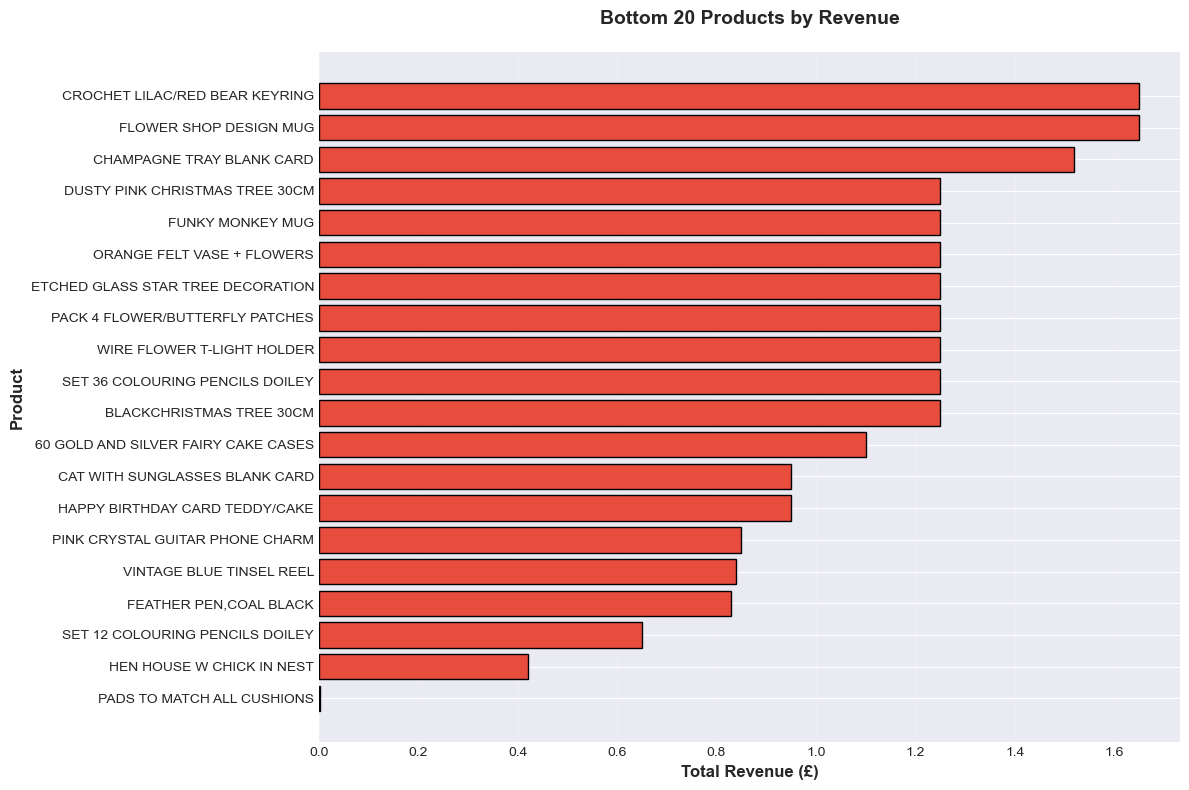

In [35]:
# Creating a horizontal bar chart for bottom 20 by revenue
plt.figure(figsize=(12, 8))
plt.barh(bottom_20_revenue['Description'], bottom_20_revenue['Total_Revenue'], color='#E74C3C', edgecolor='black')

# Add labels and title
plt.xlabel('Total Revenue (£)', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.title('Bottom 20 Products by Revenue', fontsize=14, fontweight='bold', pad=20)

# Add grid
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Save chart
plt.tight_layout()
plt.savefig('../images/underperforming_products.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.4 Key Findings - Underperforming Products

Summary:
- 20 products only sold 1 item EVER
- Some made less than £1 total (one made £0.003!)
- They're taking up space but making no money

What This Means:
These products are "dead inventory" - they cost money to store but don't sell.

## Analysis Complete!

Author: Mitesh Kumar
Date: November 2025
Dataset: Online Retail Transactions (541,909 records)
Tools: Python, Pandas, Matplotlib, Seaborn, Plotly